## PART 4: Main Func: with Modifier.py
Error: the NaN values for X show up when Modifier can't generate (given the interval) new values.

[*MAIN*]: Main loop started with parameters:  {'domain_min_range': 1, 'domain_max_range': 100, 'modifier_incremental_unit': 3, 'modifier_data_point': 10}
[*MAIN*]: Main loop started with settings:  {'do_plot': False, 'extensive_search': False, 'extensive_iteration': False} 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [(1, 100)]

Simulator...


 Modx:  [1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0] 
symx:  [-10.736801652167802, -15.931129077653399, 0.10761788316806076, 14.047860830024531, -6.055585370644534, 15.479394188472602, 28.154018923340917, 30.701939996723944, 38.352647917107056, 71.10532634089836]
       *** USING validator_controller
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [0.         0.59280946 0.00146194] -8.38928006123567 




Residuals:  [ -2.94  -8.9

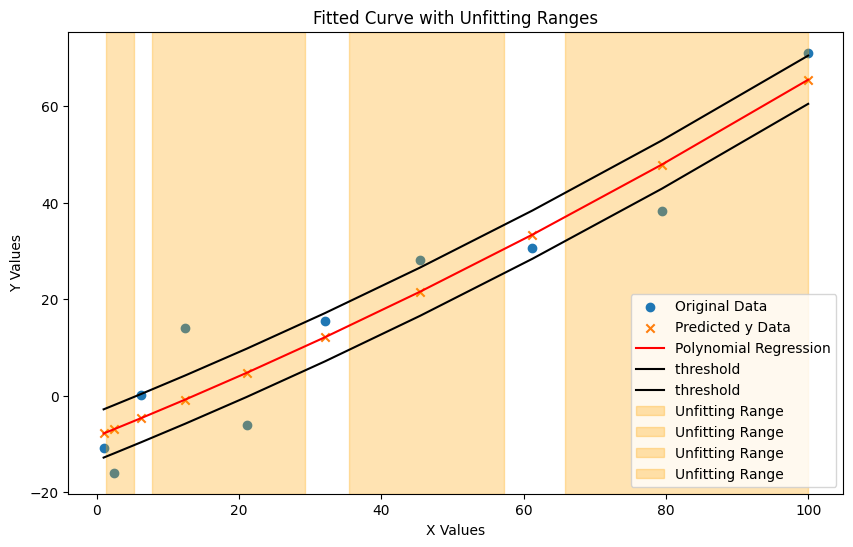

       *** OUTPUT unfitting_ranges [[1.358695652173913, 5.304347826086957], [7.815217391304348, 29.336956521739125], [35.43478260869565, 57.315217391304344], [65.80434782608695, 100.0]] 

       *** OUTPUT validator_ranges [[1.358695652173913, 5.304347826086957], [7.815217391304348, 29.336956521739125], [35.43478260869565, 57.315217391304344], [65.80434782608695, 100.0]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[1.358695652173913, 5.304347826086957], [7.815217391304348, 29.336956521739125], [35.43478260869565, 57.315217391304344], [65.80434782608695, 100.0]]

Simulator...


 Modx:  [1.358695652173913, 7.815217391304348, 12.247290672171331, 19.42120371564959, 29.336956521739125, 35.43478260869565, 41.616807959011496, 48.910286219881066, 57.315217391304344, 65.80434782608695, 73.22846517356957, 81.40244631838262, 90.32629126052609, 100.0] 
symx:  [0.5212994670206248, 0.2117004721516258, 13.815234860582098, 9.238535239106664, 2.9169188952680543, 18.61845237

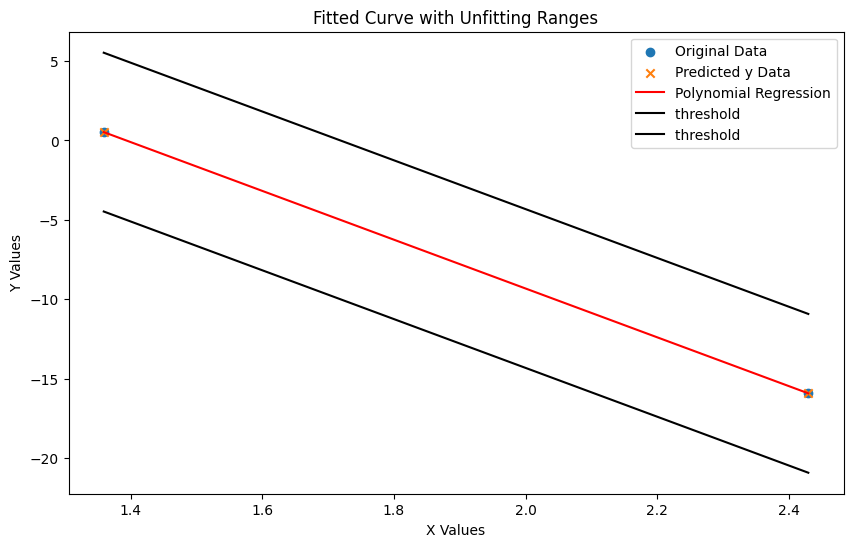

       *** OUTPUT unfitting_ranges [] 

THIS IS self.ranges  [[1.358695652173913, 5.304347826086957], [7.815217391304348, 29.336956521739125], [35.43478260869565, 57.315217391304344], [65.80434782608695, 100.0]]
THIS IS RANGE  7.815217391304348   29.336956521739125
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [ 0.          0.76255803 -0.02937707] 2.7167435914332376 




Residuals:  [ -6.67   6.17   6.39   2.79 -11.79   3.12]
5
least_fit_indices [0 1 2 4]
least_fit_points [[7.82, 0.21], [12.25, 13.82], [12.48, 14.05], [21.09, -6.06]] 






 list of ranges:  [[7.815217391304348, 17.68590278673719], [19.83840278673719, 27.275217391304345]] 



       *** USING plot_curve


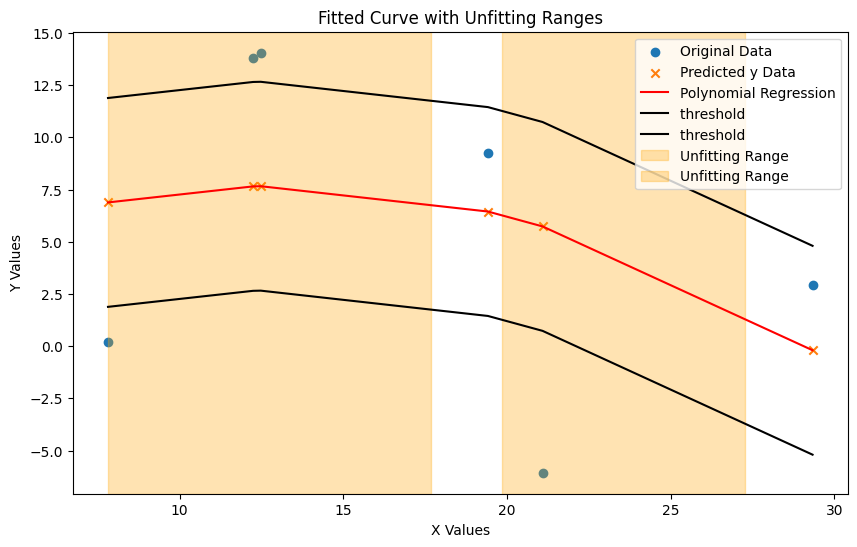

       *** OUTPUT unfitting_ranges [[7.815217391304348, 17.68590278673719], [19.83840278673719, 27.275217391304345]] 

THIS IS self.ranges  [[1.358695652173913, 5.304347826086957], [7.815217391304348, 29.336956521739125], [35.43478260869565, 57.315217391304344], [65.80434782608695, 100.0]]
THIS IS RANGE  35.43478260869565   57.315217391304344
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [ 0.          4.98706269 -0.05258792] -92.59444989737888 




Residuals:  [ 0.53 -2.32  2.71 -0.85 -0.06]
5
least_fit_indices []
least_fit_points [] 






 list of ranges:  [] 



       *** USING plot_curve


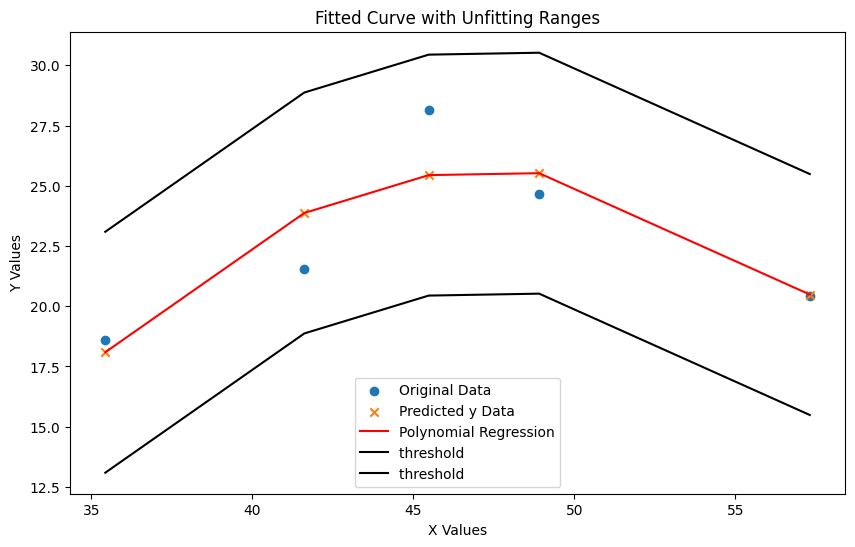

       *** OUTPUT unfitting_ranges [] 

THIS IS self.ranges  [[1.358695652173913, 5.304347826086957], [7.815217391304348, 29.336956521739125], [35.43478260869565, 57.315217391304344], [65.80434782608695, 100.0]]
THIS IS RANGE  65.80434782608695   100.0
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [ 0.         -3.39881068  0.02676299] 139.80849976577616 




Residuals:  [-0.76 -0.59 -0.34  5.95 -6.37 -1.43  3.55]
5
least_fit_indices [3 4]
least_fit_points [[81.4, 46.43], [90.33, 44.79]] 






 list of ranges:  [[79.92311157959566, 97.58157281513152]] 



       *** USING plot_curve


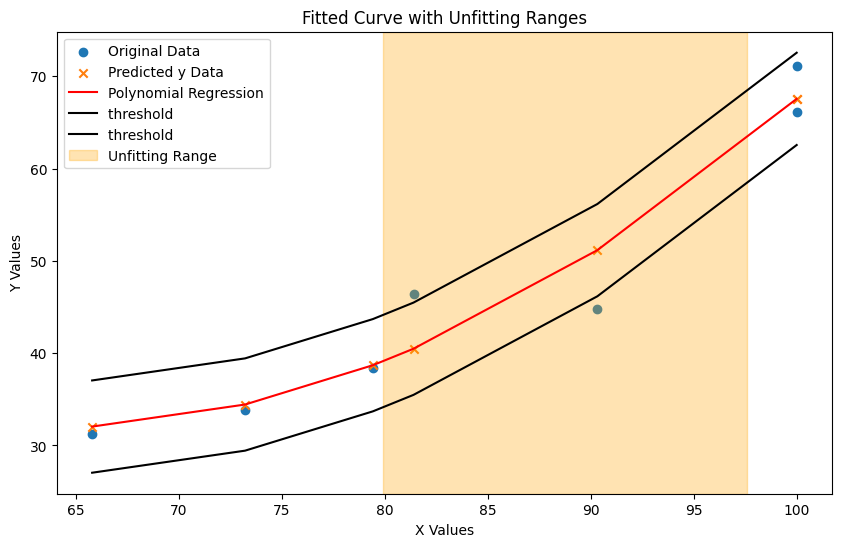

       *** OUTPUT unfitting_ranges [[79.92311157959566, 97.58157281513152]] 

       *** OUTPUT validator_ranges [[7.815217391304348, 17.68590278673719], [19.83840278673719, 27.275217391304345], [79.92311157959566, 97.58157281513152]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[7.815217391304348, 17.68590278673719], [19.83840278673719, 27.275217391304345], [79.92311157959566, 97.58157281513152]]

Simulator...


 Modx:  [7.815217391304348, 11.915138694007135, 17.68590278673719, 19.83840278673719, 27.275217391304345, 79.92311157959566, 84.0364671698751, 88.35066257255755, 92.86569778764303, 97.58157281513152] 
symx:  [-24.84342711154528, 18.514348592298433, 3.004135205175702, -2.205494062925469, 19.081671857002682, 48.177524109898634, 55.096797484931166, 46.67671421202403, 59.80619183371106, 57.6980842147509]
       *** USING validator_controller
THIS IS PONITS  [[7.815217391304348, -24.84342711154528], [11.915138694007135, 18.514348592298433], [17.685902786

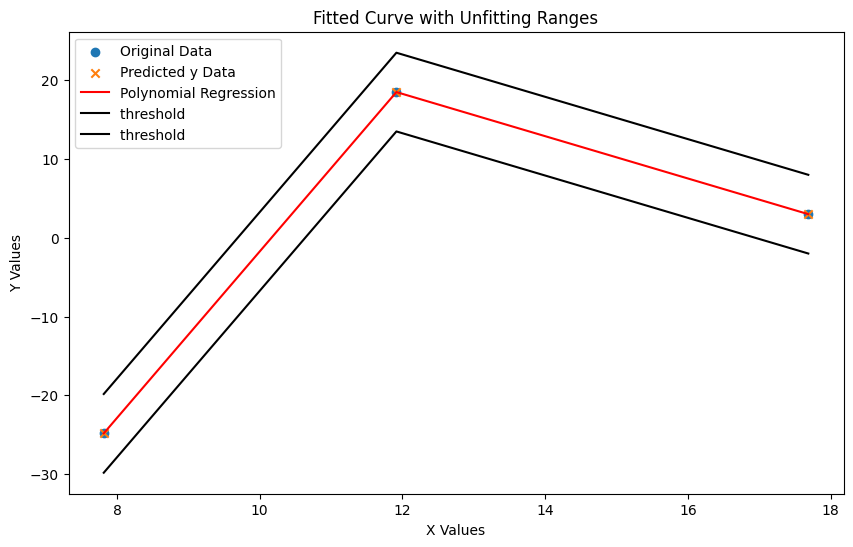

       *** OUTPUT unfitting_ranges [] 

THIS IS self.ranges  [[7.815217391304348, 17.68590278673719], [19.83840278673719, 27.275217391304345], [79.92311157959566, 97.58157281513152]]
THIS IS RANGE  19.83840278673719   27.275217391304345
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [-6.93889390e-18  1.28896857e-03  6.07279754e-02] -26.131302281995413 




Residuals:  [0. 0.]
5
least_fit_indices []
least_fit_points [] 






 list of ranges:  [] 



       *** USING plot_curve


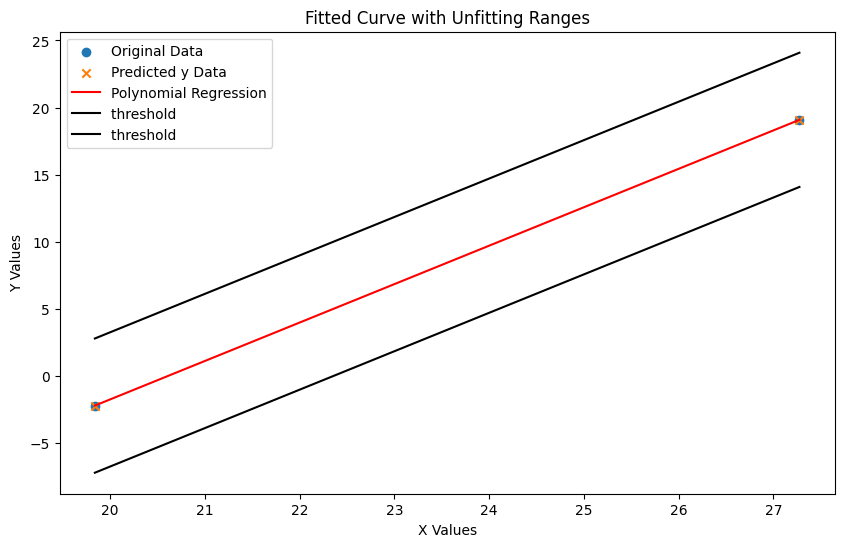

       *** OUTPUT unfitting_ranges [] 

THIS IS self.ranges  [[7.815217391304348, 17.68590278673719], [19.83840278673719, 27.275217391304345], [79.92311157959566, 97.58157281513152]]
THIS IS RANGE  79.92311157959566   97.58157281513152
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [ 0.         -7.83995601  0.04731234] 373.214371628243 




Residuals:  [-0.66 -2.1   6.6  -3.18 -6.29  6.64 -0.99]
5
least_fit_indices [2 4 5]
least_fit_points [[84.04, 55.1], [90.33, 44.79], [92.87, 59.81]] 






 list of ranges:  [[82.05911679246879, 87.27211372188694], [88.84549692941816, 96.4026040582594]] 



       *** USING plot_curve


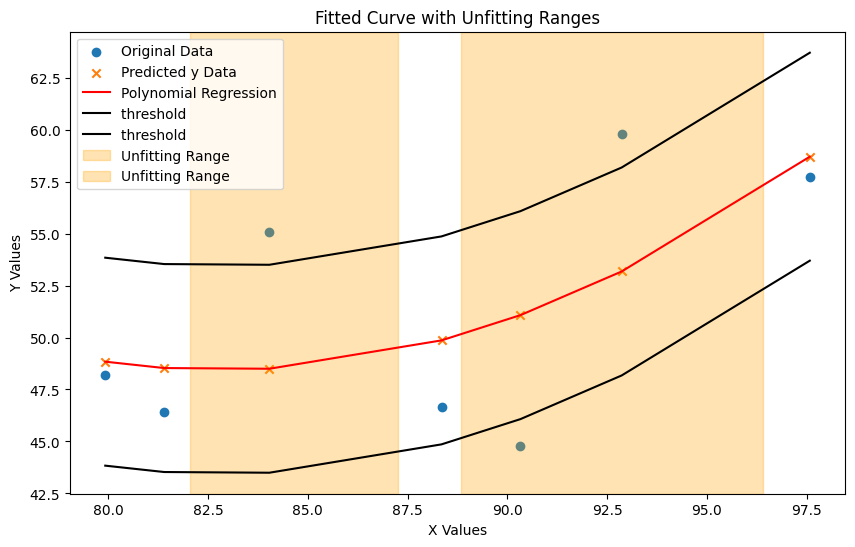

       *** OUTPUT unfitting_ranges [[82.05911679246879, 87.27211372188694], [88.84549692941816, 96.4026040582594]] 

       *** OUTPUT validator_ranges [[82.05911679246879, 87.27211372188694], [88.84549692941816, 96.4026040582594]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[82.05911679246879, 87.27211372188694], [88.84549692941816, 96.4026040582594]]


TypeError: Logger.log_modifier() missing 2 required positional arguments: 'all_intervals_mod' and 'ranges_list'

In [1]:
# IMPORT LIBRARIES
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from itertools import compress

# import global parameters 
# TODO: make interface (widget) to load/change the parameters (low-priority)
from global_settings import mdv,vlv
from global_settings import mdv,simexSettings

#import classes for Modifier, Simulator, and Validator,
from Validator import Validator
from Modifier import Modifier
from Simulator import Simulator
from Logger import Logger

validator = Validator()
modifier = Modifier
simulator = Simulator
logger = Logger()

mainfunc=True
# Initialize interval list
interval_lists=[(mdv["domain_min_range"], mdv["domain_max_range"])]
print('[*MAIN*]: Main loop started with parameters: ',mdv)
print('[*MAIN*]: Main loop started with settings: ',simexSettings,'\n')

while mainfunc:
    
    # Calls Modifier Controller
    mod_x_list= modifier.modifier_controller(ranges_list=interval_lists,local_modifier=modifier.local_modifier_A, do_plot=simexSettings["do_plot"])

    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ["modifier_data_point"] < mdv["modifier_incremental_unit"]:
        print('[*MAIN*]: --   ITERATIONS END HERE  --')
        break
    
    # Calls Simulator
    mod_x,sim_y_list = simulator.simulator_controller(mod_x_list,selected_function=simulator.sim_func_B)
    assert len(mod_x) == len(sim_y_list)
    
    # print to see outputs from Mod and Sim controllers
    temp_log = "LEN OF MODX-SIMY: ",str(len(mod_x))," symx: ",str(len(sim_y_list))
    logger.log_main(temp_log)
    print('\n\n Modx: ',mod_x,'\nsymx: ',sim_y_list)
    
    # Calls Validator controller
    ranges = validator.validator_controller(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list))
    # Updates interval_list to new range output from validator controller
    interval_lists = ranges
    # TODO: SHOULD THIS CODE BELOW BE ADDED?? (TO-CHECK)
    # TODO: SHOULD WE REMOVE ONE BETWEEN ranges AND INTERVAL_LIST ? (TO-CHECK)
    # if not ranges:
    #     mainfunc = False
    #     logger.log_main("[MAIN]: EXIT CONDITION: No more unfit points/intervals")
          
logger.log_main("   ***   VAL overall stats    ***   ")


# TODO: make a list of history variable that are needed in validator: i-e- number of points total, number of good points, etc. 

In [ ]:
logger_agruments = ["overall_stats"]

if "overall_stats" in logger_arguments:
    print("TRUE")

if "current_iteration_points_number" in logger_arguments:
    print("NO PRINT")
print("FALSE")